In [4]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

pd.set_option('display.max_rows', 100)
train_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [9]:
#데이터 전처리를 위해 train, test set을 합친다.
#sort = False로 설정해 섞이지 않도록 함
#reset.index(drop=True)로 원래 인덱스를 삭제하고 새 인덱스를 부여한다.

all_df = pd.concat([train_df, test_df], axis=0, sort=False).reset_index(drop=True)
all_df.head(3)

all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [11]:
#데이터가 온전하지 않기 때문에 각 feature에서 null value가 얼마나 포함되어 있는지 확인이 필요함
null = pd.DataFrame(all_df.isnull().sum(), columns=['# null']).sort_values(by='# null', ascending=False)
null = null[null['# null'] != 0]
null['% null'] = null['# null']/len(all_df)*100
null

,# null,% null
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
SalePrice,1459,49.982871
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071


In [13]:
#특성 변수 분류
# 1)  Categorical 한 변수는 Ordinal Variable or Nominal Variable 임(순서가 있거나 없는 이산적 변수)

categories = all_df.columns[all_df.dtypes=='object']
categories

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [15]:
#카테고리 변수의 null을 확인
for cat in categories:
  if cat in null.index:
    print(cat + ': ' + str(null.loc[cat]['# null']))

MSZoning: 4.0
Alley: 2721.0
Utilities: 2.0
Exterior1st: 1.0
Exterior2nd: 1.0
MasVnrType: 24.0
BsmtQual: 81.0
BsmtCond: 82.0
BsmtExposure: 82.0
BsmtFinType1: 79.0
BsmtFinType2: 80.0
Electrical: 1.0
KitchenQual: 1.0
Functional: 2.0
FireplaceQu: 1420.0
GarageType: 157.0
GarageFinish: 159.0
GarageQual: 159.0
GarageCond: 159.0
PoolQC: 2909.0
Fence: 2348.0
MiscFeature: 2814.0
SaleType: 1.0


In [24]:
#개별 Featuer 분석
def multi_table(table_list):
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

important_features = ['OverallQual', 'GrLivArea', 'Neighborhood', 'GarageCars', '1stFlrSF', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'YearBuilt', 'CentralAir']
numerical_vars = ['GrLivArea', 'GarageCars', '1stFlrSF', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'YearBuilt', ]
ordinal_vars = ['OverallQual']
nominal_vars = ['Neighborhood', 'CentralAir']

#Numerical Variable 다루기
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [28]:
train_df_num = train_df.select_dtypes(include=[np.number])
nonratio_features = ['Id', 'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MoSold', "YrSold"]
num_features = sorted(list(set(train_df_num)-set(nonratio_features)))
train_df_num_rs = train_df_num[num_features]
for col in num_features:
    if train_df_num_rs.describe()[col]["75%"] == 0:
        print(col, len(train_df_num_rs[train_df_num_rs[col]==0]))
        


3SsnPorch 1436
BsmtFinSF2 1293
BsmtHalfBath 1378
EnclosedPorch 1252
LowQualFinSF 1434
MiscVal 1408
PoolArea 1453
ScreenPorch 1344


In [30]:
for col in num_features:
    if train_df_num[col].nunique() < 15:
        print(col, train_df_num[col].nunique())

BedroomAbvGr 8
BsmtFullBath 4
BsmtHalfBath 3
Fireplaces 4
FullBath 4
GarageCars 5
HalfBath 3
KitchenAbvGr 4
PoolArea 8
TotRmsAbvGrd 12


In [34]:
def describe_numerical_values(train_df, all_df, numerical_vars):
    detail_desc = []
    for c in numerical_vars:
        desc = pd.DataFrame(columns=['feature', 'data', 'type', 'count', 'mean', 'median', 'std', 'min', 'max', 'skew', 'null'])
        desc.loc[0] = [c, 'Train', train_df[c].dtype.name, train_df[c].count(), train_df[c].mean(), train_df[c].median(), train_df[c].std(), train_df[c].min(), train_df[c].max(), train_df[c].skew(), train_df[c].isnull().sum()]
        desc.loc[1] = [c, 'All', train_df[c].dtype.name, all_df[c].count(), all_df[c].mean(), all_df[c].median(), all_df[c].std(), all_df[c].min(), all_df[c].max(), all_df[c].skew(), all_df[c].isnull().sum()]
        desc = desc.set_index(['feature', 'data'],drop=True)
        detail_desc.append(desc.style.background_gradient())
    return detail_desc

multi_table(describe_numerical_values(train_df, all_df, numerical_vars))

NameError: name 'HTML' is not defined

NameError: name 'sns' is not defined

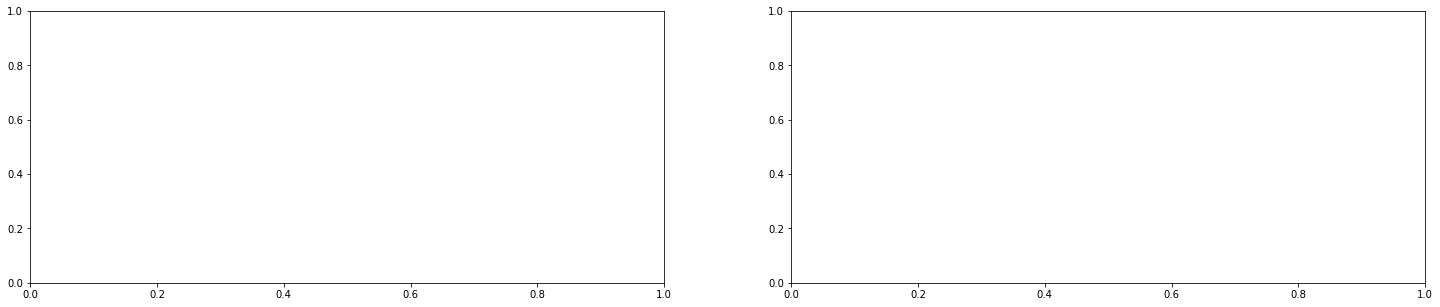

In [36]:
f, ax = plt.subplots(1, 2, figsize=(25, 5))
sns.distplot(analytic_train_df.GrLivArea, ax=ax[0])
sns.histplot(data=analytic_train_df, x='GrLivArea', hue='SalePriceClass', ax=ax[1], element='step')

for i in range(2):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].set_xlabel('GrLivArea', weight='bold', size=15)
    ax[i].set_ylabel('Density', weight='bold', size=15)
    ax[i].set_facecolor('#f6f5f5')
f.suptitle("GrLivArea' distribution", weight='bold', size=20)
plt.show()